# Insight on Global Warming

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")

In [4]:
data.dropna(axis=0 , inplace=True)

In [5]:
data["Month"]=data["dt"].map(lambda x:int(x.split("-")[1]))

In [6]:
data["Year"]=data["dt"].map(lambda x:int(x.split("-")[0]))

In [7]:
data.drop(axis=1 ,labels="dt" ,inplace=True)

In [8]:
data.drop(axis=1 ,labels="AverageTemperatureUncertainty" ,inplace=True)

In [9]:
bangalore_avg=data[data["City"]=="Bangalore"].groupby("Year").mean()["AverageTemperature"]

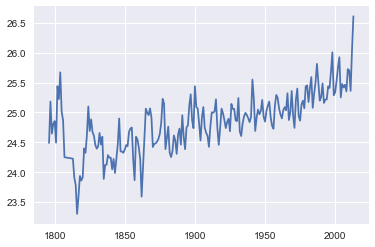

In [10]:
plt.plot(bangalore_avg)

In [11]:
def group_a_month(city,mon):
    tmp=data[(data["City"]==city) & (data["Month"]==mon)][["Year" , "AverageTemperature"]]
    tmp.set_index("Year" ,inplace="True")
    return tmp

In [12]:
def group_all_months(city):
    month=[]
    month.append(0);
    for i in range(1,13):
        month.append(group_a_month(city,i))
    return month    
    
        
    

In [13]:
def group_all_cities():
    cities={}
    i=0
    for city in data["City"].unique():
        cities[city]=group_all_months(city)
        i+=1
        if i==2:
            break
    return cities

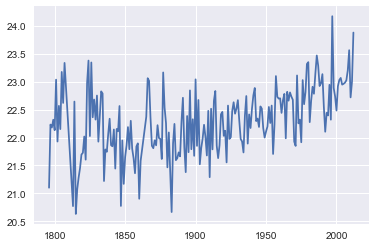

In [14]:
plt.plot(group_all_months("Bangalore")[12])

In [15]:
def plot_a_city(city):
    city_plot=group_all_months(city)
    fig,axes =plt.subplots(nrows=12 ,ncols=1,figsize=(13,70))
    for i in range(0,12):
        axes[i].plot(city_plot[i+1])
        axes[i].set_xlabel("Years")
        axes[i].set_ylabel("Temperature")
        axes[i].set_title("Month " + str(i+1))
        
    

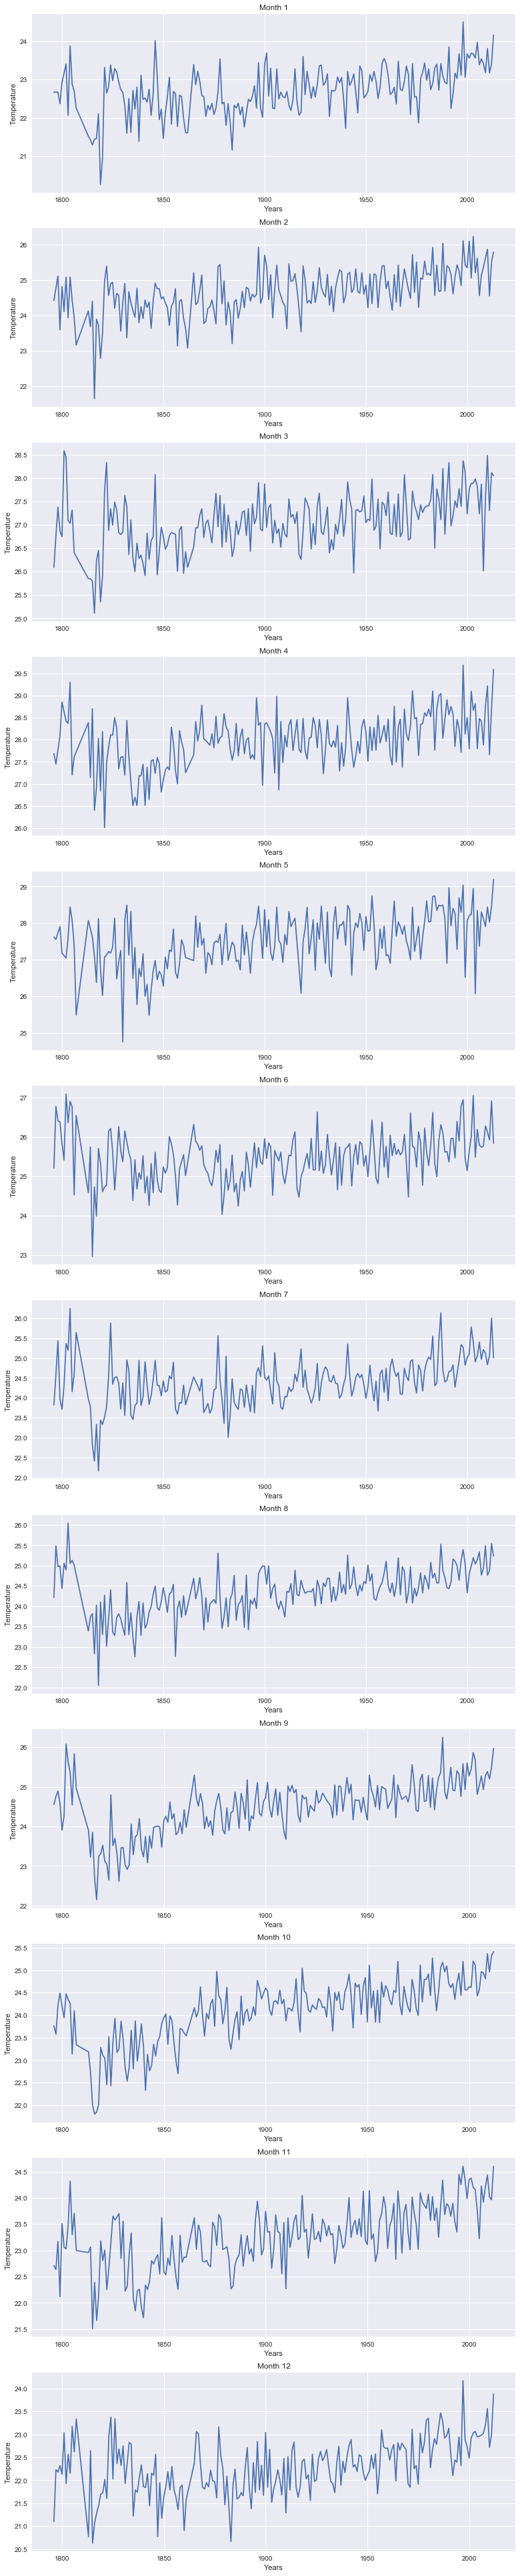

In [16]:
plot_a_city("Bangalore")

In [17]:
data

,AverageTemperature,City,Country,Latitude,Longitude,Month,Year
0,6.068,Århus,Denmark,57.05N,10.33E,11,1743
5,5.788,Århus,Denmark,57.05N,10.33E,4,1744
6,10.644,Århus,Denmark,57.05N,10.33E,5,1744
7,14.051,Århus,Denmark,57.05N,10.33E,6,1744
8,16.082,Århus,Denmark,57.05N,10.33E,7,1744
10,12.781,Århus,Denmark,57.05N,10.33E,9,1744
11,7.950,Århus,Denmark,57.05N,10.33E,10,1744
12,4.639,Århus,Denmark,57.05N,10.33E,11,1744
13,0.122,Århus,Denmark,57.05N,10.33E,12,1744
14,-1.333,Århus,Denmark,57.05N,10.33E,1,1745


In [18]:

data1=pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [24]:
data1["City"].nunique()

100